<a href="https://colab.research.google.com/github/Arghavankas2022/NMA/blob/main/Plotting_likelihood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# @title Download and unzip the data
import os, requests, zipfile

fname = 'task1_classic_classification.zip'
url = "https://data.caltech.edu/records/s0vdx-0k302/files/task1_classic_classification.zip?download=1"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)
else:
  print('Data have already been downloaded!!!')

if not os.path.exists('task1_classic_classification'):
  # Unzip the file
  with zipfile.ZipFile(fname, 'r') as zip_ref:
    zip_ref.extractall('.')


# Download the script
fname = 'calms21_convert_to_npy.py'
url = "https://data.caltech.edu/records/s0vdx-0k302/files/calms21_convert_to_npy.py?download=1"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

In [5]:
!python calms21_convert_to_npy.py  --input_directory '.' --output_directory '.' #--parse_treba #added for loading extra features

Saving ./calms21_task1_test
Saving ./calms21_task1_train


In [6]:
def load_task1_data(data_path):
  """
  Load data for task 1:
      The vocaubulary tells you how to map behavior names to class ids;
      it is the same for all sequences in this dataset.
  """
  data_dict = np.load(data_path, allow_pickle=True).item()
  dataset = data_dict['annotator-id_0']
  # Get any sequence key.
  sequence_id = list(data_dict['annotator-id_0'].keys())[0]
  vocabulary = data_dict['annotator-id_0'][sequence_id]['metadata']['vocab']
  return dataset, vocabulary

In [ ]:
def filter_sequences_by_frame_count(dataset, min_frame_count=14000):
    filtered_dataset = {k: v for k, v in dataset.items() if len(v['annotations']) > min_frame_count}
    return filtered_dataset

In [7]:
training_data, vocab = load_task1_data('./calms21_task1_train.npy')
test_data, _ = load_task1_data('./calms21_task1_test.npy')

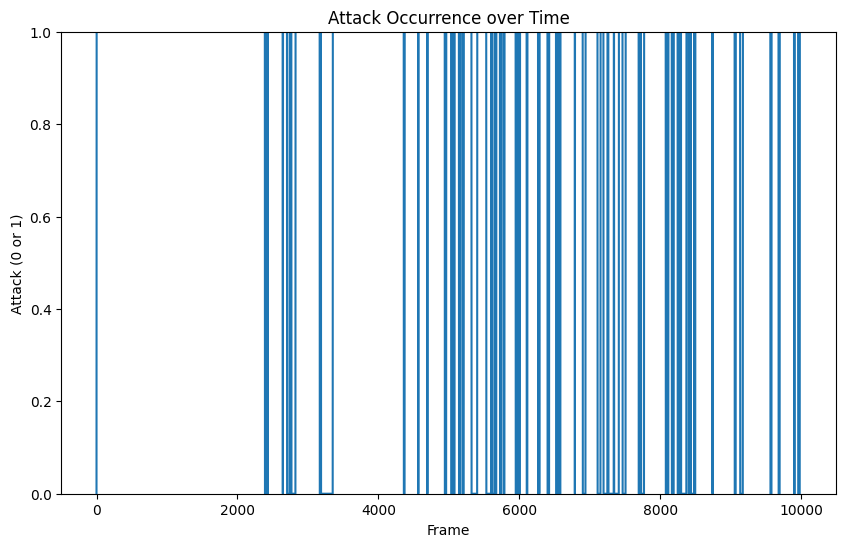

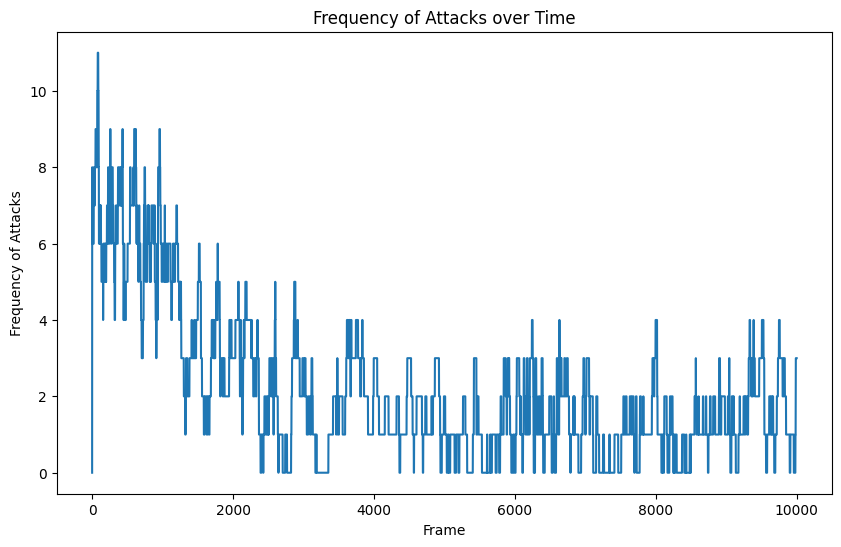

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Combine training and test data
all_data = {**training_data, **test_data}

# Extract the investigation label id
behavior_id = vocab['attack']

# Initialize
all_frames_behavior = []

# Iterate through all sequences
for sequence_key, sequence_data in all_data.items():
    annotations = sequence_data['annotations']
    # Check if desired behavior is happening in each frame
    behavior_likelihood = (annotations == behavior_id).astype(int)
    all_frames_behavior.append(behavior_likelihood)

# Set the desired number of frames to a maximum of 10000
max_frames = 10000

# Initialize
num_sequences = len(all_frames_behavior)
plot_data = np.zeros((num_sequences, max_frames))

# Iterate through each sequence
for i, seq in enumerate(all_frames_behavior):
    seq_length = len(seq)
    if seq_length > max_frames:
        plot_data[i] = seq[:max_frames]
    else:
        plot_data[i, :seq_length] = seq

# Calculate the maximum likelihood of behavior across all sequences for each frame
max_behavior_likelihood = np.max(plot_data, axis=0)

# Plot the likelihood of behavior
plt.figure(figsize=(10, 6))
plt.plot(max_behavior_likelihood)
plt.xlabel('Frame')
plt.ylabel('Attack (0 or 1)')
plt.title('Attack Occurrence over Time')
plt.ylim(0, 1)
plt.show()

# Calculate the frequency of attack occurrences across all sequences for each frame
attack_frequency_per_frame = np.sum(plot_data, axis=0)

# Plot the frequency of attacks per frame
plt.figure(figsize=(10, 6))
plt.plot(attack_frequency_per_frame)
plt.xlabel('Frame')
plt.ylabel('Frequency of Attacks')
plt.title('Frequency of Attacks over Time')
plt.show()
